# 예시로 배우는 평균의 정확성
- 경험적 히스토그램의 확률적 히스토그램으로
- 중심극한정리

1부터 7까지의 카드가 한 장씩 들어 있는 상자를 이용하여 표본평균에 대해 알아보자. 25개의 카드를 복원추출

In [0]:
import numpy as np
import random
import matplotlib.pyplot as plt

box= np.array([1,2,3,4,5,6,7])

choiceLIst = [random.choice(box) for i in range(25)] # 복원추출로 25개의 숫자를 박스에서 꺼내보자
choiceLIst

[4, 5, 4, 1, 4, 7, 1, 6, 7, 3, 2, 4, 2, 1, 2, 7, 2, 5, 7, 5, 7, 4, 7, 1, 2]

In [0]:
# 상자의 평균 (모평균)
box.mean()

4.0

In [0]:
#모집단 합의 기대값 (이항분포 기대값 = n*p)
box.mean()*25 

100.0

25개의 추출을 무수히 많이 실행하면 어떻게 될까??
- 여기서 그 무수히를 10,50,100,1000,10000으로 가정해보자.

In [0]:
def make_sum_hist(num,range_num=25):
  total_list=[]
  for _ in range(0,num):
    choiceLIst = [random.choice(box) for i in range(range_num)] # 복원추출로 25개의 숫자를 박스에서 꺼내보자
    total_list.append(choiceLIst)

  graph_list=[]
  for li in total_list:
    graph_list.append(sum(li))

  plt.title(num)
  plt.hist(graph_list)
  plt.show()

def make_sampling_dist(num,range_num=25):
  total_list=[]
  for _ in range(0,num):
    choiceLIst = [random.choice(box) for i in range(range_num)] # 복원추출로 25개의 숫자를 박스에서 꺼내보자
    total_list.append(choiceLIst)

  graph_list=[]
  for li in total_list:
    graph_list.append(sum(li)/range_num)                       # 단순히 표본크기로 나누나 마냐 그차이임.

  plt.title(num)
  plt.hist(graph_list)
  plt.show()

숫자 추출의 반복이 많아질수록 그것에 대한 합의 평균이 점점 기대값으로 가까워진다. 경험적 히스토그램이 확률히스토그램으로 되는 것을 볼 수가 있다.
- 경험적 히스토그램 : 우리가 직접 시행해서 얻는 히스토그램
- 확률적 히스토그램 : 우리가 계산한 확률로 만든 히스토그램

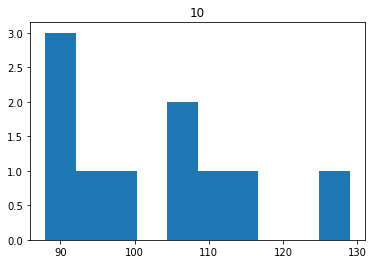

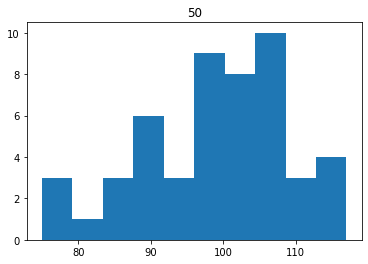

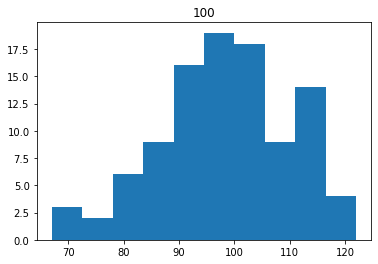

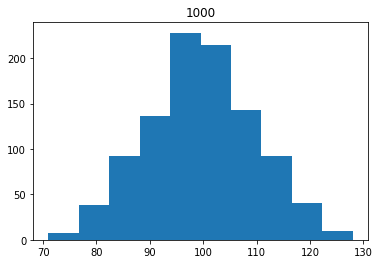

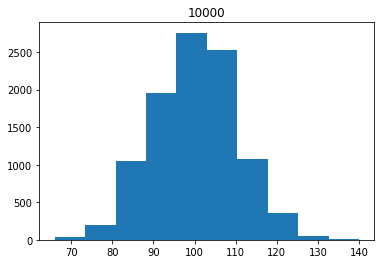

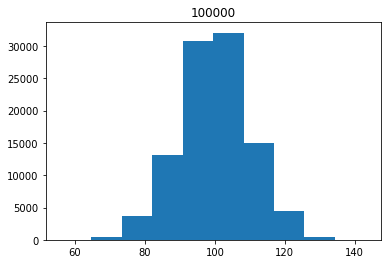

In [0]:
for i in [10,50,100,1000,10000,100000]:
  make_hist(i)

그럼 여기서 표본평균은 어떻게 구하면 되는 것인가?

In [0]:
#표본합의 기대값 
print(25*box.mean())
#표본합의 표준편차:
print(np.sqrt(25)*box.std())

100.0
10.0


표본합의 기대값,표본합의 표준편차에에서 표본의 개수로만 나눠주면 된다.
- 결과적으로 표본 평균은 4이고, 그에 대한 표준편차는 0.4인 것을 알 수있다.
- 여기서 우리는 정규본포의 원리를 이용해서 64,95%의 법칙을 이용해 모집단의 평균을 추정하는 것이다.

In [0]:
#모집단의 평균 
print(box.mean()) =4
#모짐단 평균의 표준편차:
print(np.sqrt(25)*box.std()/25) = 0.4

4.0
0.4


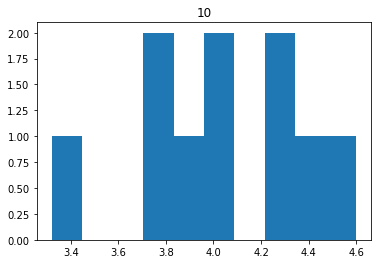

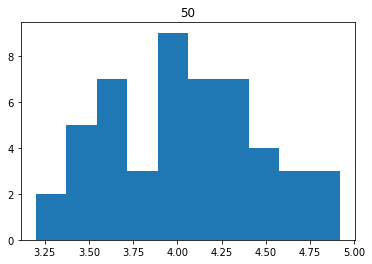

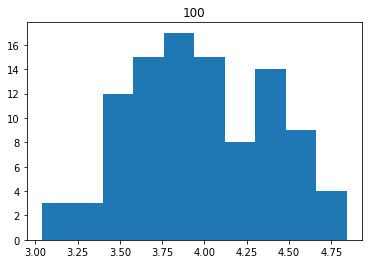

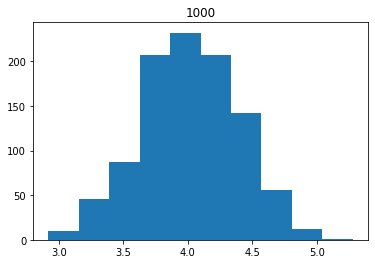

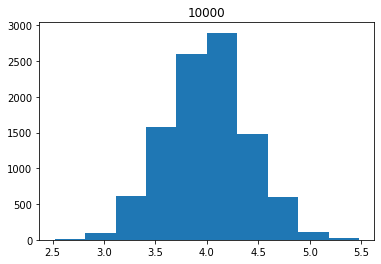

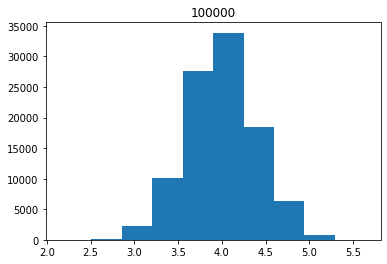

In [0]:
for i in [10,50,100,1000,10000,100000]:
  make_sampling_dist(i)

박스안에 들어있는 숫자들이 정규분포와 다르게 분포해도 성립함.
- 중심극한정리의 원리를 생각하면 됨.
- 표본의 크기(추출횟수)만 늘리면 정규분포 곡선으로 잘 근사함.

6.0


(array([1., 1., 1., 0., 1., 1., 0., 1., 1., 7.]),
 array([1. , 1.7, 2.4, 3.1, 3.8, 4.5, 5.2, 5.9, 6.6, 7.3, 8. ]),
 <a list of 10 Patch objects>)

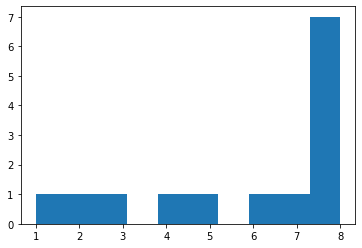

In [0]:
box = np.array([1,2,3,4,5,6,7,8,8,8,8,8,8,8])
print(box.mean())
plt.hist(box) 

단 여기서 조건이 있다. 시행횟수는 무한히(상당히 많이 줬다.)라는 것의 기반이 있어야함.

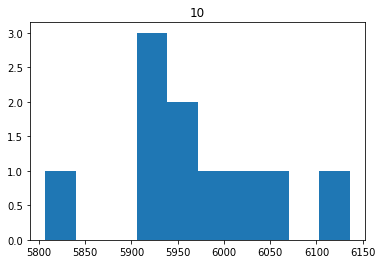

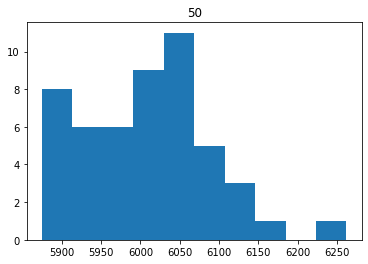

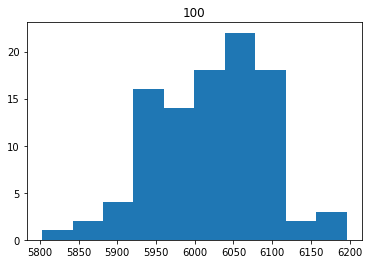

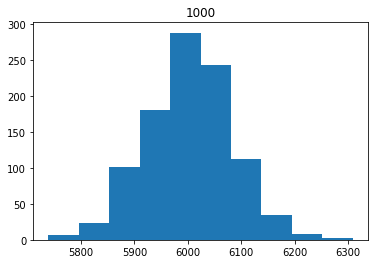

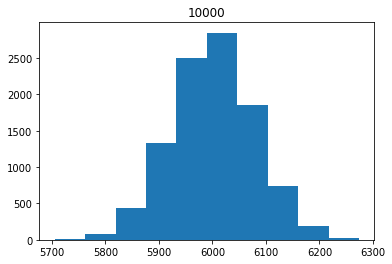

In [0]:
for i in [10,50,100,1000,10000]:
  make_sum_hist(i,1000)

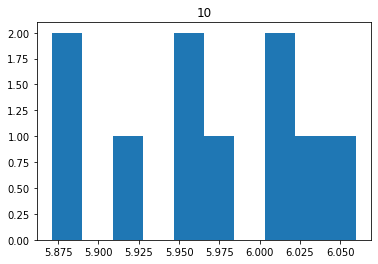

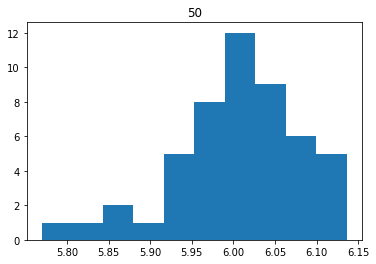

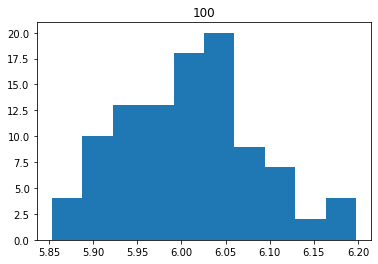

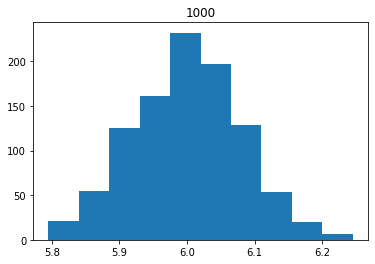

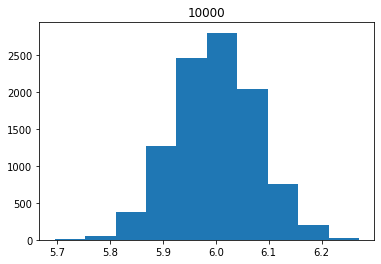

In [0]:
for i in [10,50,100,1000,10000]:
  make_sampling_dist(i,1000)


---

제곱근의 법칙
- 표본크기가 증가할수록 표본합의 표준오차는 증가하지만 표본평균의 표준오차는 감소한다. 

In [0]:
box=np.array([1,2,3,4,5,6,7])
print('mean:',box.mean())
print('std:',box.std())

mean: 4.0
std: 2.0


표본이 25일 때

In [0]:
def cal_1(n,mean,std):
  ex = mean*n
  se = np.sqrt(n)*std

  print('표본의 개수가 %s 일때 표본합의'%(n))

  print('기대값은',ex)
  print('표준오차는',se)

def cal_2(n,mean,std):
  ex = mean*n/n
  se = np.sqrt(n)*std/n

  print('표본의 개수가 %s 일때 표본평균의'%(n))

  print('기대값은',ex)
  print('표준오차는',se)

In [0]:
cal_1(25,box.mean(),box.std())

표본의 개수가 25 일때 표본합의
기대값은 100.0
표준오차는 10.0


In [0]:
cal_1(100,box.mean(),box.std())

표본의 개수가 100 일때 표본합의
기대값은 400.0
표준오차는 20.0


표본평균은 어떻게 변할까?

In [0]:
cal_2(25,box.mean(),box.std())

표본의 개수가 25 일때 표본평균의
기대값은 4.0
표준오차는 0.4


In [0]:
cal_2(100,box.mean(),box.std())

표본의 개수가 100 일때 표본평균의
기대값은 4.0
표준오차는 0.2


제곱근의 법칙으로 알 수 있는 것은 무엇일까?
- 표본을 늘릴 수록 기대값에 대한 표준 오차는 증가를 하지만, 결국 우리가 원하는 평균(**왜냐하면 이걸로 모집단의 모수를 추정해야 하기 때문**)의 표준편차는 줄어드는 것을 알 수 있다.
- 이유는 간단하다. 표준편차를 구할 때 "루트n(표본개수)" 을 곱하지만
 - 평균의 표준편차를 구할 때 n(표본개수)로 나눠주기 때문임.
 - 루트n/n = 1/루트n이 되므로 제곱근의 법칙이 되는 것.

모집단의 평균을 추정할 때, 표본 평균과 표본 평균의 오차(표본표준편차)로 신뢰구간을 잡아 구해야 하는 이유는?
- 표본합의 표준오차(표준편차*루트n)는 하나의 관측치가 상자의 평균에 떨어져 있는 정도를 보여주는 것.
- 표본평균의 표준오차(표본표준편차/n)는 추출한 관측치들의 평균이 상자의 평균에 떨어져 있는 정도를 보여주는 것.


# 유의성 검정
- 귀무가설을 기각해야할지 기각을 할지 말지를 정할 때 쓰는 방법
z = (통계량 - 기대값) / 통계량의 표준오차

여기서 알아야할 제일 중요한 개념
분자에 사용된 통계량에 따라 통계량(관측치)의 표준오차는 바뀐다는 점이다.

통계량이 합(n*표본의 평균)인지, 평균(표본의 평균), 표본 개수(n*p)에 따라서
- 분모에 합의 표준오차, 표본평균의 표준오차,표본 개수의 표준오차를 쓸지를 정해야함.
___
ex)
한 사장로부터 무작위로 100장의 카드를 복원추출한다. 추출한 값들은 평균이 102.7이고, 표준편차가 10이다. 누군가 상자 안의 평균이 100이라고 주장한다면 그 주장은 믿을만한가? 또 평균이 101.1이라고 주장한다면 어떤가?
- n(표분의 개수) =100, 표본의 평균 = 102.7, 표본의 표준편차(표준편차,s) = 10
- 귀무가설: 1. 모집단의 평균은 100이다. 2. 모집단의 평균이 101.1이다.
----


z = (통계량 - 기대값) / 통계량의 표준오차

z = (102.7 -100)/ 10 일까? 아니다. 여기서는 분모에 들어가는 관측치(통계량)가 평균이기 때문에
- z = (102.7-100)/(10/루트(100)) 으로 해야함.
 - z = 2.7 이므로 기무가설이 참이다는 가정하에 표본의 평균이 102.7일 확률은 z= 2.7이상일 확률이므로 0.0135 (1.35%)
 - 유의수준을 2로 정했으면 z=2.7이므로 귀무가설을 기각한다.

# 두 집단간 평균의 차이에 대한 검정
- 두 집단간 독립이 되어야 가능함.
 - 두 평균간 차이의 표준오차는 (var(X_)+var(Y_))^{1/2} : 제곱근 분산합 공식

 ![대체 텍스트](http://www.stat.yale.edu/Courses/1997-98/101/zstat2.gif)

 - 귀무가설에서는 M1-M2가 0 이기 때문에, 분자는(X1표본평균-X2표본평균)